## RQ3: Age dependecy ratios and male and female unemployment

### Importing necessary packages

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing the dataset
Getting some descriptive statistics. Checking for null values.

In [8]:
deprivation = pd.read_csv("DeprivationIndex.csv")

deprivation.shape
deprivation.head()
deprivation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3420 entries, 0 to 3419
Data columns (total 16 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   OBJECTID                                    3420 non-null   int64  
 1   ED ID                                       3420 non-null   object 
 2   ED Name                                     3420 non-null   object 
 3   Constituency                                3420 non-null   object 
 4   County                                      3420 non-null   object 
 5   Population                                  3420 non-null   int64  
 6   Pobal HP Description 2022                   3420 non-null   object 
 7   Pobal HP Index 2022                         3420 non-null   float64
 8   Age Dependency Ratio 2022 %                 3420 non-null   float64
 9   Lone Parent Ratio 2022 %                    3420 non-null   float64
 10  Prop. Primar

In [30]:
vars_of_interest = [
    "Population",
    "Pobal HP Index 2022",
    "Prop. Primary Education Only 2022 %",
    "Lone Parent Ratio 2022 %",
    "Proportion at Third Level Education 2016 %",
    "Unemployment Rate - Female",
    "Unemployment Rate - Male",
    "Age Dependency Ratio 2022 %"
]

desc_table = deprivation[vars_of_interest].describe().T

desc_table = desc_table[["count", "mean", "std", "min", "max"]]

desc_table = desc_table.rename(columns={
    "count": "N",
    "mean": "Mean",
    "std": "Std. Dev.",
    "min": "Min",
    "max": "Max"
})

desc_table = desc_table.round(2)

desc_table

desc_table.to_latex("descriptive_statistics.tex")


<Axes: >

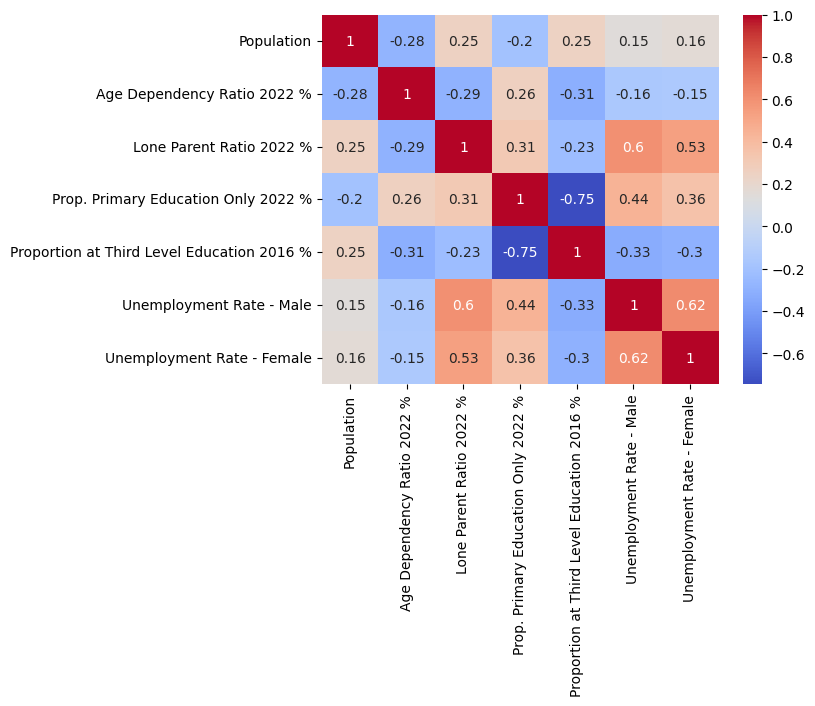

In [25]:
sns.heatmap(deprivation[['Population', 'Age Dependency Ratio 2022 %', 'Lone Parent Ratio 2022 %', 'Prop. Primary Education Only 2022 %', 'Proportion at Third Level Education 2016 %', 'Unemployment Rate - Male', 'Unemployment Rate - Female']].corr(), annot=True, cmap='coolwarm')

### 

In [13]:
M_unemployment = deprivation["Unemployment Rate - Male"]
F_unemployment = deprivation["Unemployment Rate - Female"]
age_dependency = deprivation["Age Dependency Ratio 2022 %"]

#Selecting the Variables of Interest for Question 3. Now Combining them into one dataframe. Dropping NAs

dep_subset = pd.DataFrame({"Unemployment Rate - Male": M_unemployment, 
                      "Unemployment Rate - Female": F_unemployment,
                    "Age Dependency Ratio 2022 %": age_dependency})

dep_subset = dep_subset.dropna()

dep_subset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3420 entries, 0 to 3419
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unemployment Rate - Male     3420 non-null   float64
 1   Unemployment Rate - Female   3420 non-null   float64
 2   Age Dependency Ratio 2022 %  3420 non-null   float64
dtypes: float64(3)
memory usage: 80.3 KB


In [23]:
correlationF = dep_subset["Unemployment Rate - Female"].corr(
    dep_subset["Age Dependency Ratio 2022 %"])

print("Correlation Coefficient:", correlationF)

correlationM = dep_subset["Unemployment Rate - Male"].corr(
    dep_subset["Age Dependency Ratio 2022 %"])

print("Correlation Coefficient:", correlationM)


Correlation Coefficient: -0.15142550117245
Correlation Coefficient: -0.15508544179214448


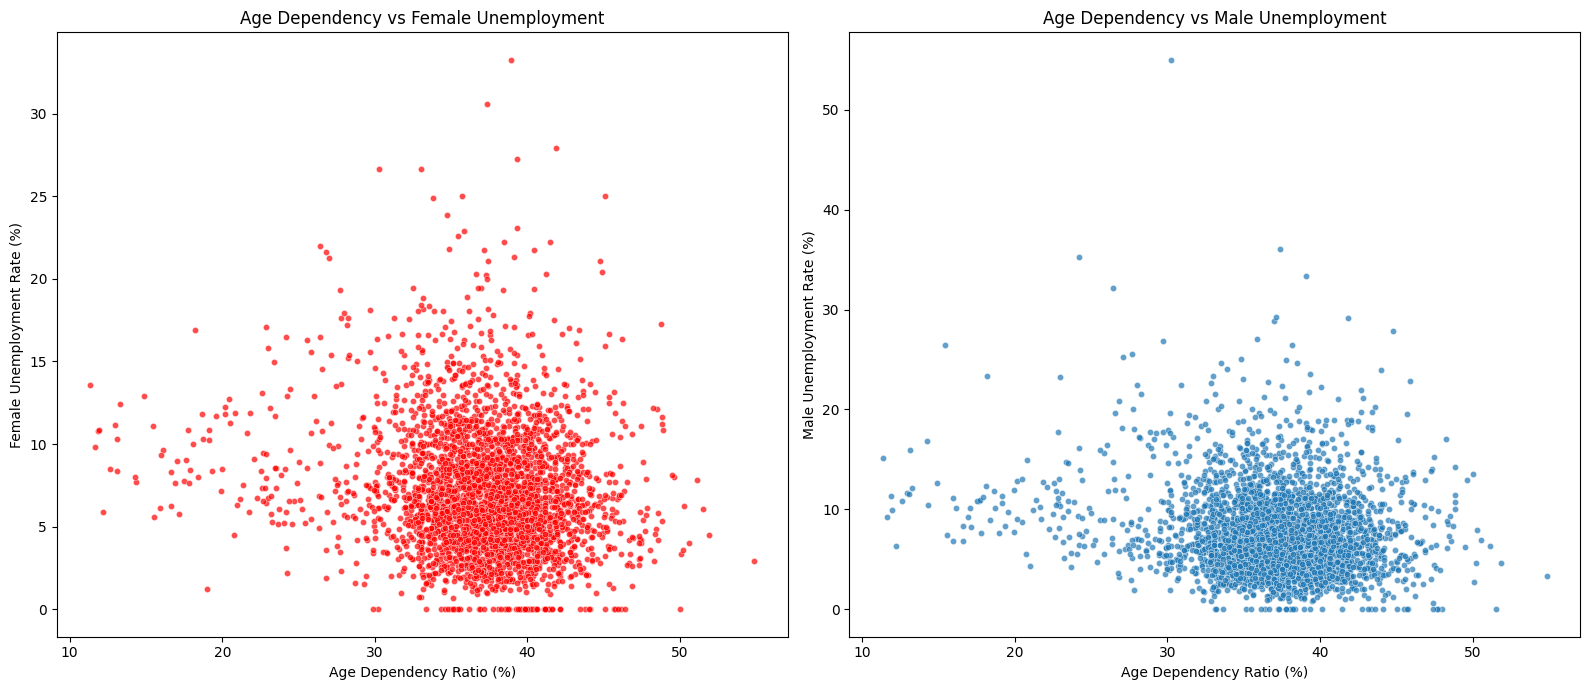

In [21]:

fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharex=True)

# Age dependency vs Female unemployment
sns.scatterplot(
    x="Age Dependency Ratio 2022 %",
    y="Unemployment Rate - Female",
    data=dep_subset,
    ax=axes[0],
    s=20,        # smaller dots
    alpha=0.7,
    color="red"
)
axes[0].set_title("Age Dependency vs Female Unemployment")
axes[0].set_xlabel("Age Dependency Ratio (%)")
axes[0].set_ylabel("Female Unemployment Rate (%)")

# Age dependency vs Male unemployment
sns.scatterplot(
    x="Age Dependency Ratio 2022 %",
    y="Unemployment Rate - Male",
    data=dep_subset,
    ax=axes[1],
    s=20,        # smaller dots
    alpha=0.7
)
axes[1].set_title("Age Dependency vs Male Unemployment")
axes[1].set_xlabel("Age Dependency Ratio (%)")
axes[1].set_ylabel("Male Unemployment Rate (%)")

plt.tight_layout()
plt.show()

